# Shocktube Test

In [1]:
# import
import plot_tools as pt

# more setup
#matplotlib widget
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

#### Load Data

In [2]:
dirs = [
    "n200",
    "n400",
    "n800",
    "n1600"
]
for i in range(len(dirs)):
    dirs[i] = "../data/shocktube/Balsara1/" + dirs[i]

dataset_rho = pt.load_dataset(dirs, r"hydrobase-rho*")
dataset_bvec = pt.load_dataset(dirs, r"hydrobase-bvec*")
data_exact = pt.load_data("../data/shocktube/exact_solutions/Balsara1/solution_last.dat")

loading ../data/shocktube/Balsara1/n200/hydrobase-rho.it000320.x.tsv
loading ../data/shocktube/Balsara1/n400/hydrobase-rho.it000640.x.tsv
loading ../data/shocktube/Balsara1/n800/hydrobase-rho.it001280.x.tsv
loading ../data/shocktube/Balsara1/n1600/hydrobase-rho.it002560.x.tsv
loading ../data/shocktube/Balsara1/n200/hydrobase-bvec.it000320.x.tsv
loading ../data/shocktube/Balsara1/n400/hydrobase-bvec.it000640.x.tsv
loading ../data/shocktube/Balsara1/n800/hydrobase-bvec.it001280.x.tsv
loading ../data/shocktube/Balsara1/n1600/hydrobase-bvec.it002560.x.tsv
loading ../data/shocktube/exact_solutions/Balsara1/solution_last.dat


#### Interpolate

In [3]:
funcset_rho = pt.interp_dataset(dataset_rho, cols=[8,11])
funcset_bvecy = pt.interp_dataset(dataset_bvec, cols=[8,12])
#
rho_exact = pt.interp_data(data_exact, cols=[1,2])
bvecy_exact = pt.interp_data(data_exact, cols=[1,7])

In [4]:
diffset_rho = pt.diff_dataset(funcset_rho, rho_exact)
diffset_bvecy = pt.diff_dataset(funcset_bvecy, bvecy_exact)

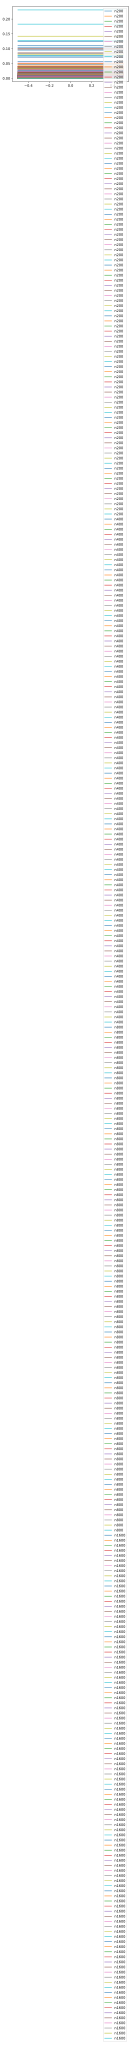

In [5]:
pt.plot(diffset_rho)

In [7]:
diff_rho = pt.diff_data(funcset_rho[3][1], rho_exact)

In [5]:
import numpy as np
import matplotlib.pyplot as plt

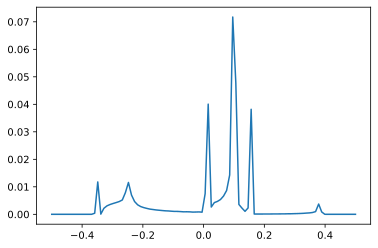

In [8]:
plt.plot(diffset_rho[3][1][0], diffset_rho[3][1][1])

In [10]:
xnew = np.linspace(-0.5, 0.5, num=20)

In [11]:
[i for i in range(len(xnew))]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

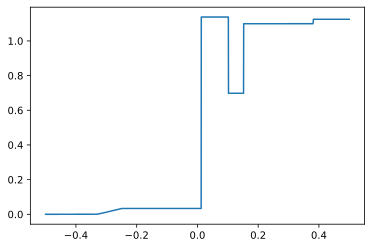

In [16]:
plt.plot(xnew, abs(bvecy_exact(xnew)-rho_exact(xnew)), '-')

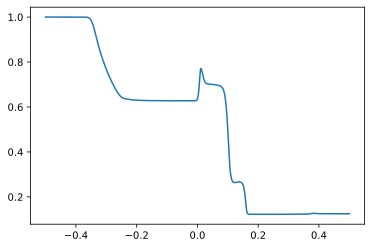

In [14]:
plt.plot(xnew, funcset_rho[2][1](xnew), '-')

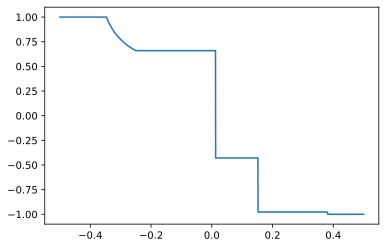

In [17]:
plt.plot(xnew, bvec_y_exact(xnew), '-')

#### Calculate Difference with Exact Solution

## $\rho$

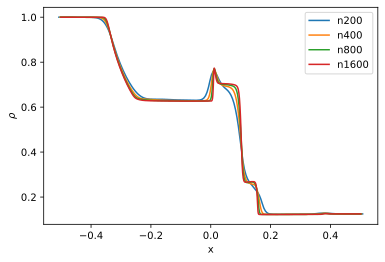

In [4]:
pt.plot(dataset_rho, cols=[8,11], labels=['x',r'$\rho$'])

## $B_y$

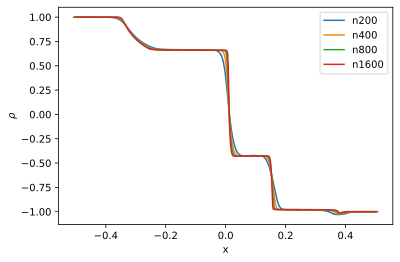

In [5]:
pt.plot(dataset_bvec, cols=[8,12], labels=['x',r'$\rho$'])